### Predicting a categorical response

In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

I am going to import a dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html) that can be found [here](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column).

This dataset contains 6 biomechanical features used to classify orthopaedic patients into 2 classes - normal and abnormal:
  * pelvic incidence
  * pelvic tilt
  * lumbar lordosis angle
  * sacral slope
  * pelvic radius
  * grade of spondylolisthesis
  
Data loaded below:

In [2]:
vertebral_data = pd.read_csv("./vertebral_column_2_categories.dat", sep=" ",
                             names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","spondy_grade","outcome"])
vertebral_data.outcome.value_counts()

AB    210
NO    100
Name: outcome, dtype: int64

In [3]:
vertebral_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondy_grade,outcome
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In order to use linear regression for this task, I have to convert my **categorical** target into a number:

In [4]:
vertebral_data["outcome_number"] = (vertebral_data.outcome=='AB').astype(int)
vertebral_data.outcome_number.value_counts()

1    210
0    100
Name: outcome_number, dtype: int64

In [5]:
vertebral_data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondy_grade,outcome,outcome_number
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,0
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,0
309,33.84,5.07,36.64,28.77,123.95,-0.20,NO,0


My outcome is no longer a value, but a number. Below I plot `pelvic_incidence` relative to this new numeric `outcome_number`:

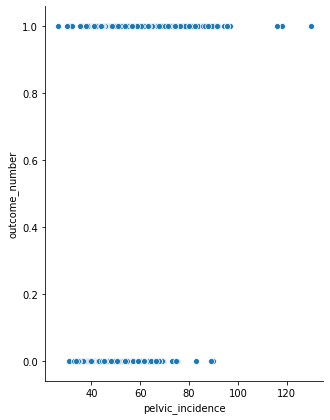

In [6]:
sns.pairplot(vertebral_data,x_vars=["pelvic_incidence"],y_vars="outcome_number", height=6, aspect=0.8);

And now I will do a simple linear regression using this feature as the sole predictor and the converted outcome number as the target using scikit-learn:

In [7]:
# fit a linear regression model and store the predictions
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
linreg = LinearRegression()
linreg.fit(X, y)
outcome_pred = linreg.predict(X)

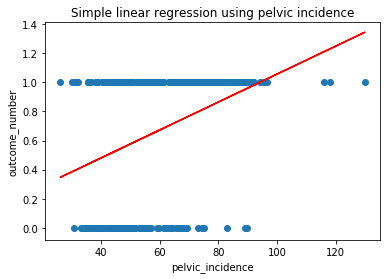

In [8]:
# scatter plot that includes the regression line
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number);
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_pred, color='red');
sns.mpl.pyplot.xlabel(feature_cols[0]);
sns.mpl.pyplot.ylabel(y.name);
sns.mpl.pyplot.title("Simple linear regression using pelvic incidence");

Predictions below:

In [9]:
outcome_pred[:10]

array([0.70173614, 0.47167114, 0.75740477, 0.76191585, 0.57389026,
       0.4830928 , 0.60959496, 0.53223477, 0.51706986, 0.44892378])

If **pelvic_incidence=35**, I predict **0** the class for the outcome

So, I predict the 0 class for **lower** values of `pelvic_incidence`, and the 1 class for **higher** values of `pelvic_incidence`.

My cutoff value should be around **pelvic_incidence=45**, because that's where the linear regression line crosses the midpoint (0.5) between predicting class 0 and class 1.

So, I'll say that if **outcome_pred >= 0.5**, I predict a class of **1**, else I predict a class of **0**.

In [10]:
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(outcome_pred >= .5, 1, 0)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [11]:
# transform predictions to 1 or 0
outcome_pred_class = np.where(outcome_pred >= 0.5, 1, 0)
outcome_pred_class

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

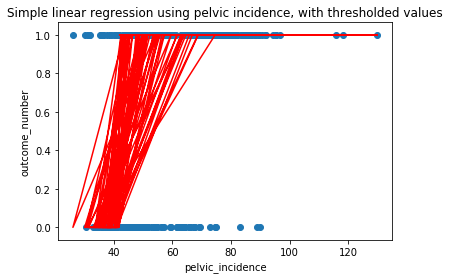

In [12]:
# plot the class predictions
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number);
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_pred_class, color='red');
sns.mpl.pyplot.xlabel(feature_cols[0]);
sns.mpl.pyplot.ylabel(y.name);
sns.mpl.pyplot.title("Simple linear regression using pelvic incidence, with thresholded values");

What went wrong? This is a line plot, and it connects points in the order they are found. I need to sort the `DataFrame` by **pelvic_incidence** to fix this:

In [13]:
# add predicted class to DataFrame
vertebral_data['outcome_pred_class'] = outcome_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
vertebral_data.sort_values('pelvic_incidence', inplace=True)

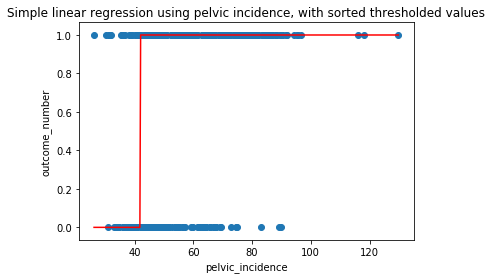

In [14]:
# plot the class predictions again
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number);
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, vertebral_data.outcome_pred_class, color='red');
sns.mpl.pyplot.xlabel(feature_cols[0]);
sns.mpl.pyplot.ylabel(y.name);
sns.mpl.pyplot.title("Simple linear regression using pelvic incidence, with sorted thresholded values");

### Use Logistic Regression Instead of Linear Regression on Categorical Outcome Variables

Logistic regression can do exactly what I just did, but automatically, and also provide the likelihood (probability) that a given class is class 1:

In [15]:
logreg = LogisticRegression(C=1e9,solver='lbfgs')
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
logreg.fit(X, y)
outcome_pred_class_log = logreg.predict(X)

In [16]:
# print the class predictions
outcome_pred_class_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

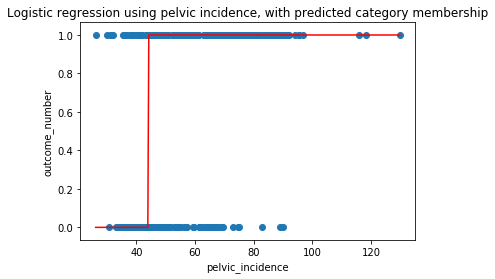

In [17]:
# plot the class predictions
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number);
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_pred_class_log, color='red');
sns.mpl.pyplot.xlabel(feature_cols[0]);
sns.mpl.pyplot.ylabel(y.name);
sns.mpl.pyplot.title("Logistic regression using pelvic incidence, with predicted category membership");

Below I am showing the **predicted probabilites** instead of just the **class predictions**, to understand how confident given predictions are.

In [42]:
logreg.predict_proba(X)

array([[0.72243964, 0.27756036],
       [0.67732366, 0.32267634],
       [0.67035095, 0.32964905],
       [0.66450237, 0.33549763],
       [0.66390268, 0.33609732],
       [0.66149869, 0.33850131],
       [0.65411524, 0.34588476],
       [0.6424681 , 0.3575319 ],
       [0.63315181, 0.36684819],
       [0.63252708, 0.36747292],
       [0.625752  , 0.374248  ],
       [0.62234569, 0.37765431],
       [0.62095444, 0.37904556],
       [0.61167211, 0.38832789],
       [0.60898644, 0.39101356],
       [0.60667916, 0.39332084],
       [0.60346672, 0.39653328],
       [0.60308062, 0.39691938],
       [0.5997291 , 0.4002709 ],
       [0.59623877, 0.40376123],
       [0.5904    , 0.4096    ],
       [0.58270619, 0.41729381],
       [0.58048166, 0.41951834],
       [0.57851612, 0.42148388],
       [0.5774668 , 0.4225332 ],
       [0.57247317, 0.42752683],
       [0.57049787, 0.42950213],
       [0.56997074, 0.43002926],
       [0.56521957, 0.43478043],
       [0.56482308, 0.43517692],
       [0.

In [19]:
# store the predicted probabilites of class 1
outcome_probs = logreg.predict_proba(X)[:, 1]

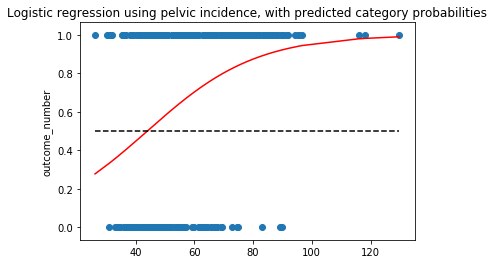

In [20]:
# plot the predicted probabilities, and the 50% line
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number);
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red');
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence,np.ones(outcome_probs.shape)*.5,'k--');
sns.mpl.pyplot.ylabel(y.name);
sns.mpl.pyplot.title("Logistic regression using pelvic incidence, with predicted category probabilities");

In [21]:
# examine some example predictions
print("Pelvic incidence of 15:", logreg.predict_proba([[15]]))
print("Pelvic incidence of 10:", logreg.predict_proba([[10]]))
print("Pelvic incidence of 55:", logreg.predict_proba([[55]]))

Pelvic incidence of 15: [[0.82580388 0.17419612]]
Pelvic incidence of 10: [[0.86117045 0.13882955]]
Pelvic incidence of 55: [[0.35553784 0.64446216]]


The first number in each entry indicates the predicted probability of **class 0**, and the second number in each entry indicates the predicted probability of **class 1**.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [22]:
# create a table of probability versus odds
prob_table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]})
prob_table['odds'] = prob_table.probability/(1 - prob_table.probability)
prob_table

,probability,odds
0,0.100,0.111111
1,0.200,0.250000
2,0.250,0.333333
3,0.300,0.428571
4,0.400,0.666667
5,0.500,1.000000
6,0.600,1.500000
7,0.700,2.333333
8,0.800,4.000000
9,0.900,9.000000


In [26]:
# add log-odds to the table
prob_table['log_odds'] = np.log(prob_table.odds)
prob_table

,probability,odds,log_odds
0,0.100,0.111111,-2.197225
1,0.200,0.250000,-1.386294
2,0.250,0.333333,-1.098612
3,0.300,0.428571,-0.847298
4,0.400,0.666667,-0.405465
5,0.500,1.000000,0.000000
6,0.600,1.500000,0.405465
7,0.700,2.333333,0.847298
8,0.800,4.000000,1.386294
9,0.900,9.000000,2.197225


### Interpreting Logistic Regression Coefficients

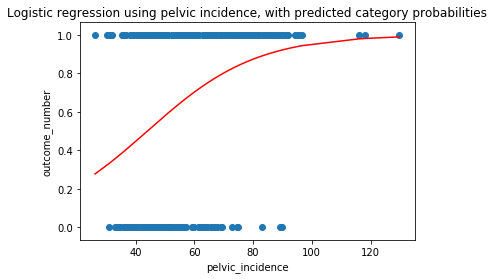

In [27]:
# plot the predicted probabilities again
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number);
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red');
sns.mpl.pyplot.xlabel(feature_cols[0]);
sns.mpl.pyplot.ylabel(y.name);
sns.mpl.pyplot.title("Logistic regression using pelvic incidence, with predicted category probabilities");

In [28]:
# compute predicted log-odds for pelvic_incidence=55 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 55
print("Log odds:",logodds)

Log odds: [0.59478442]


In [29]:
# convert log-odds to odds
odds = np.exp(logodds)
print("odds:",odds)

odds: [1.81264014]


In [30]:
# convert odds to probability, this is the number you would see in the plot above where x= 55
prob = odds/(1 + odds)
print("probability:",prob)

probability: [0.64446216]


In [31]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba([[90]])[:, 1]

array([0.92250464])

In [32]:
# examine the coefficient for pelvic_incidence
pd.DataFrame(list(zip(feature_cols, logreg.coef_[0])),columns=["feature_name","coeff"])

,feature_name,coeff
0,pelvic_incidence,0.053774


**Interpretation:** A 1 unit increase in `pelvic_incidence` is associated with a ~0.054 unit increase in the log-odds of `outcome`, where a positive outcome is having a vertebral abnormality (not positive in the real world, but positive in how I coded my outcome feature).

In [33]:
# increasing pelvic_incidence by 1 (so that pelvic_incidence=56) increases the log-odds by about 0.054
logodds = 0.59481302 + 0.053766875792266015
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.6566903741190347

In [34]:
# compute predicted probability for pelvic_incidence=56 using the predict_proba method
logreg.predict_proba([[91]])[:, 1]

array([0.92626265])

**Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).**

In [35]:
# examine the intercept
logreg.intercept_

array([-2.36278552])

**Interpretation:** For a 'pelvic_incidence' value of 0, the log-odds of 'outcome' is -2.36.

In [36]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.08605486])

That makes sense from the plot above, because the probability of outcome=1 should be very low for such a low `pelvic_incidence` value.

![logistic betas example](./images/logistic_betas_example.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

The non-bias $\beta$ coefficients are effectively estimates of how certain the outcome given how much evidence that specific feature gives. A really high magnitude (positive or negative) value means a very certain of the outcome, given I/we know that feature's value.

There are two common (inverse) measurements we can make that capture the performance of my classification model:
  * **Classification accuracy**: percentage of correct predictions (**reward function**)
  * **Classification error**: percentage of incorrect predictions (**loss function**)


In [37]:
y = vertebral_data.outcome_number
y_pred = outcome_pred_class
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

Model accuracy: 0.6258064516129033


## Extending the LR model to handle multiple features
Extending the logistic regression model to incorporate all of the features in the dataset is necessary now.

This can be done using `train_test_split` to make sure that we train and validate the model on distinct sets of data:

In [38]:
all_features_X = vertebral_data[vertebral_data.columns.tolist()[:-3]]
all_y = vertebral_data.outcome_number

all_X_train,all_X_test,all_y_train,all_y_test = train_test_split(all_features_X,
                                                                 all_y,
                                                                 test_size=0.3,
                                                                 random_state=1)

In [39]:
logreg_all = LogisticRegression(C=1e9,solver="lbfgs")
logreg_all.fit(all_X_train,all_y_train)

print("Accuracy on training data: {:0.3f}".format(metrics.accuracy_score(all_y_train,
                                                                         logreg_all.predict(all_X_train))))

print("Accuracy on test data: {:0.3f}".format(metrics.accuracy_score(all_y_test,
                                                                     logreg_all.predict(all_X_test))))

Accuracy on training data: 0.857
Accuracy on test data: 0.828


Now, inspect all of the coefficients and sort them by their magnitude to see which features have the largest impact on the outcome:

In [40]:
coeffs_df = pd.DataFrame(list(zip(vertebral_data.columns.tolist()[:-3],
                                  logreg_all.coef_[0])),
                         columns=["feature","coefficient"])
coeffs_df["abs_coeff"] = coeffs_df.coefficient.abs()
coeffs_df.sort_values("abs_coeff",ascending=False,inplace=True)
coeffs_df

,feature,coefficient,abs_coeff
5,spondy_grade,0.166886,0.166886
1,pelvic_tilt,0.161644,0.161644
4,pelvic_radius,-0.118809,0.118809
0,pelvic_incidence,-0.071040,0.071040
2,lumbar_lordosis_angle,-0.024332,0.024332
3,sacral_slope,-0.011935,0.011935


In [41]:
logreg_all.intercept_

array([15.8866704])

### Comparing Logistic Regression with Other Models

Logistic regression has some really awesome advantages:

  * It is a highly interpretable method (if you remember what the conversions from log-odds to probability are)
  * Model training and prediction are fast
  * No tuning is required (excluding regularization)
  * No need to scale features
  * Outputs well-calibrated predicted probabilities (the probabilities behave like probabilities)

However, here are the disadvantages:

  * It presumes a linear relationship between the features and the log-odds of the response
  * Compared to other, fancier modeling approaches, performance is (generally) not competitive with the best supervised learning methods
  * Like linear regression for regression, it is sensitive to irrelevant features
  * Unless you explicitly code them, logistic regression can't automatically learn feature interactions